In [61]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import ReLU, RandomContrast, RandomTranslation, RandomFlip, RandomRotation, Input, LeakyReLU, Conv2D, Activation, MaxPool2D, Flatten, Dense, Reshape, Conv2DTranspose, UpSampling2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import Callback
from pathlib import Path
import os
import pathlib
import time
import datetime
from matplotlib import pyplot as plt
from IPython import display
import cv2
import numpy as np
from glob import glob 
from keras import backend as K
from contextlib import redirect_stdout
from keras.models import Model
from tensorflow.keras.applications import EfficientNetB0


PATH = 'G:/Deletar/pictures_conv'
tf.random.set_seed(42) 
PRECISION = tf.float32
HEIGHT = 224
WIDTH = 224
FILTERS = 128
KERNEL_SIZE = 3
STRIDES = 1
BATCH = 1
OUTPUT_CHANNELS = 3
BUFFER_SIZE = 1002
IMG_RANGE = 255.



train_bw = glob("G:\\Deletar\\pictures_conv\\train_new\\bw\\*.jpg")
train_color = glob("G:\\Deletar\\pictures_conv\\train_new\\color\\*.jpg")
test_bw = glob("G:\\Deletar\\pictures_conv\\test_new\\bw\\*.jpg")
test_color = glob("G:\\Deletar\\pictures_conv\\test_new\\color\\*.jpg")

In [62]:
# apply black and white colors to image
def apply_bw(filename):
    img = plt.imread(filename)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Input IMG is RGB
    img = cv2.merge([img,img,img])
    return img

def resize_image2(data):
    resized_img = tf.image.resize(
    images=K,
    size=[HEIGHT, WIDTH],
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=True,
    )    
    return resized_img

def process_img(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, PRECISION)
    img = tf.image.resize(img, size=(HEIGHT, WIDTH))
    return img

# read img and transform into tensor image
def read_img(filename):
    img = plt.imread(filename)
    if len(img.shape) == 2:
        img = cv2.merge([img,img,img])
    img = tf.convert_to_tensor(img/IMG_RANGE, dtype=PRECISION)
    return img

def get_all_info(folder):
    imgs = []
    for file in os.listdir(folder):
        img_tensor = read_img(folder + "\\" + file) 
    return imgs

""" z = get_all_info("G:\\Deletar\\pictures_conv\\train_new\\bw") """

files_ds = tf.data.Dataset.from_tensor_slices((train_bw, train_color))
files_ds = files_ds.map(lambda x, y: (process_img(x), process_img(y))).batch(BATCH).shuffle(BUFFER_SIZE)
val_files = tf.data.Dataset.from_tensor_slices((test_bw, test_color))
val_files = val_files.map(lambda x, y: (process_img(x), process_img(y))).batch(BATCH)

example = list(files_ds.as_numpy_iterator())
example2 = list(val_files.as_numpy_iterator())

In [63]:
""" def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(Conv2D(filters, size, padding='same', strides=2, name='conv2d_01', kernel_initializer=initializer, use_bias=False,),)                           
    if apply_batchnorm:
      result.add(BatchNormalization())
    result.add(LeakyReLU())
    return result """
  
def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(Conv2D(filters, size, padding='same', strides=2, name='conv2d_01', kernel_initializer=initializer, use_bias=False,),)                           
    if apply_batchnorm:
      result.add(BatchNormalization())
    result.add(LeakyReLU())
    return result

""" def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)
  result = Sequential()
  result.add(
    Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))
  result.add(BatchNormalization())
  if apply_dropout:
      result.add(Dropout(0.5))
  result.add(ReLU())
  return result """

def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)
  result = Sequential()
  result.add(
    Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))
  result.add(BatchNormalization())
  if apply_dropout:
      result.add(Dropout(0.5))
  result.add(ReLU())
  return result

""" result.add(MaxPool2D((2, 2),  padding='same')) """

class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, x_test):
        self.model = model

    def on_epoch_end(self, epoch, logs={}):
      if epoch % 5 == 0: 
        z = self.model.predict(example[0][0])
        plt.imshow(z[0])
        plt.show()
        

Epoch 1/200
250/250 [==============================] - 7s 24ms/step - loss: 0.0391 - accuracy: 0.3824 - val_loss: 0.0377 - val_accuracy: 0.4410


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


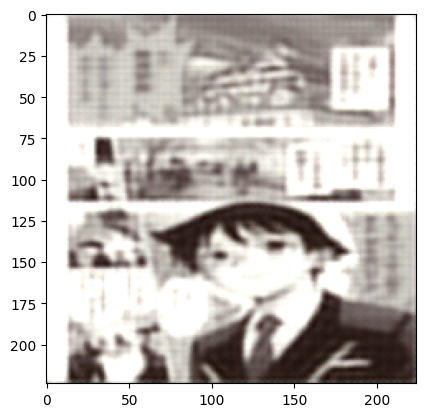

Epoch 2/200
250/250 [==============================] - 6s 23ms/step - loss: 0.0231 - accuracy: 0.4044 - val_loss: 0.0159 - val_accuracy: 0.5248
Epoch 3/200
250/250 [==============================] - 6s 24ms/step - loss: 0.0192 - accuracy: 0.4142 - val_loss: 0.0137 - val_accuracy: 0.3046
Epoch 4/200
250/250 [==============================] - 6s 23ms/step - loss: 0.0167 - accuracy: 0.4223 - val_loss: 0.0141 - val_accuracy: 0.3126
Epoch 5/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0156 - accuracy: 0.4181 - val_loss: 0.0191 - val_accuracy: 0.3893
Epoch 6/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0144 - accuracy: 0.4142 - val_loss: 0.0125 - val_accuracy: 0.3621


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


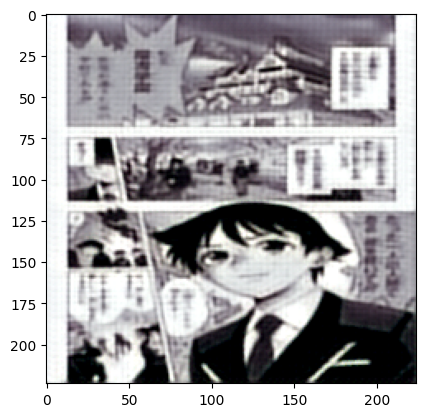

Epoch 7/200
250/250 [==============================] - 5s 22ms/step - loss: 0.0138 - accuracy: 0.4284 - val_loss: 0.0117 - val_accuracy: 0.4554
Epoch 8/200
250/250 [==============================] - 6s 23ms/step - loss: 0.0137 - accuracy: 0.4204 - val_loss: 0.0501 - val_accuracy: 0.5387
Epoch 9/200
250/250 [==============================] - 6s 23ms/step - loss: 0.0127 - accuracy: 0.4299 - val_loss: 0.0099 - val_accuracy: 0.2800
Epoch 10/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0124 - accuracy: 0.4232 - val_loss: 0.0134 - val_accuracy: 0.4270
Epoch 11/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0118 - accuracy: 0.4187 - val_loss: 0.0095 - val_accuracy: 0.3210


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


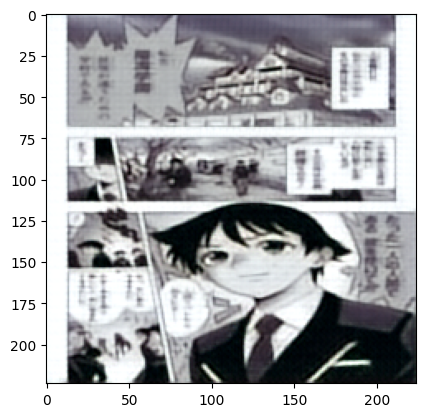

Epoch 12/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0115 - accuracy: 0.4301 - val_loss: 0.0209 - val_accuracy: 0.5343
Epoch 13/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0116 - accuracy: 0.4247 - val_loss: 0.0195 - val_accuracy: 0.5344
Epoch 14/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0111 - accuracy: 0.4330 - val_loss: 0.0153 - val_accuracy: 0.3255
Epoch 15/200
250/250 [==============================] - 5s 21ms/step - loss: 0.0110 - accuracy: 0.4315 - val_loss: 0.0087 - val_accuracy: 0.5138
Epoch 16/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0110 - accuracy: 0.4151 - val_loss: 0.0116 - val_accuracy: 0.3105


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


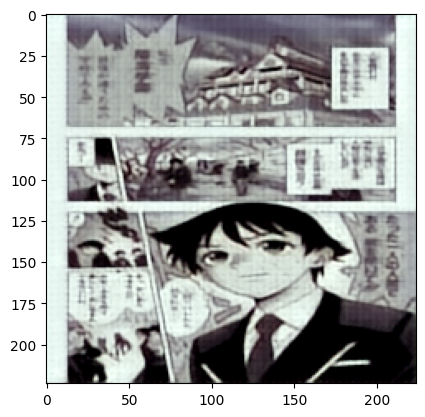

Epoch 17/200
250/250 [==============================] - 5s 22ms/step - loss: 0.0105 - accuracy: 0.4221 - val_loss: 0.0200 - val_accuracy: 0.5416
Epoch 18/200
250/250 [==============================] - 5s 21ms/step - loss: 0.0105 - accuracy: 0.4228 - val_loss: 0.0102 - val_accuracy: 0.3853
Epoch 19/200
250/250 [==============================] - 6s 23ms/step - loss: 0.0103 - accuracy: 0.4366 - val_loss: 0.0096 - val_accuracy: 0.3372
Epoch 20/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0103 - accuracy: 0.4332 - val_loss: 0.0087 - val_accuracy: 0.3266
Epoch 21/200
250/250 [==============================] - 5s 21ms/step - loss: 0.0100 - accuracy: 0.4248 - val_loss: 0.0090 - val_accuracy: 0.5269


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


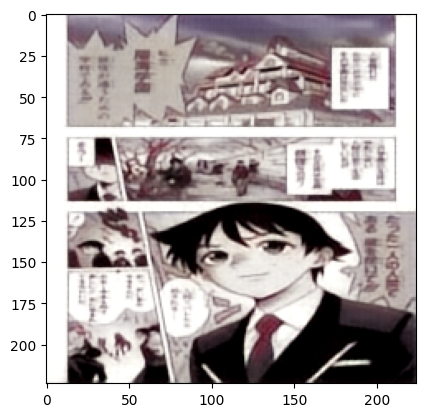

Epoch 22/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0097 - accuracy: 0.4340 - val_loss: 0.0087 - val_accuracy: 0.3629
Epoch 23/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0098 - accuracy: 0.4427 - val_loss: 0.0094 - val_accuracy: 0.5542
Epoch 24/200
250/250 [==============================] - 6s 23ms/step - loss: 0.0097 - accuracy: 0.4335 - val_loss: 0.0116 - val_accuracy: 0.5406
Epoch 25/200
250/250 [==============================] - 6s 23ms/step - loss: 0.0096 - accuracy: 0.4361 - val_loss: 0.0084 - val_accuracy: 0.2961
Epoch 26/200
250/250 [==============================] - 6s 23ms/step - loss: 0.0096 - accuracy: 0.4324 - val_loss: 0.0083 - val_accuracy: 0.3413


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


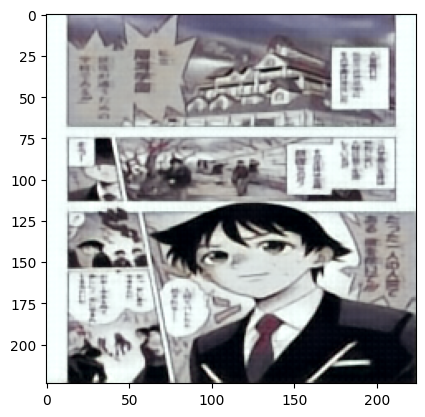

Epoch 27/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0095 - accuracy: 0.4366 - val_loss: 0.0083 - val_accuracy: 0.5485
Epoch 28/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0093 - accuracy: 0.4399 - val_loss: 0.0099 - val_accuracy: 0.5401
Epoch 29/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0092 - accuracy: 0.4331 - val_loss: 0.0089 - val_accuracy: 0.3198
Epoch 30/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0092 - accuracy: 0.4388 - val_loss: 0.0092 - val_accuracy: 0.4012
Epoch 31/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0091 - accuracy: 0.4415 - val_loss: 0.0093 - val_accuracy: 0.5444


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


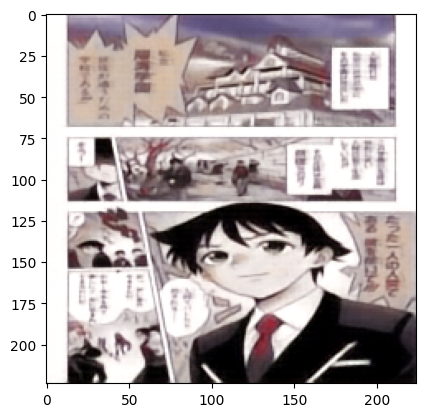

Epoch 32/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0091 - accuracy: 0.4391 - val_loss: 0.0084 - val_accuracy: 0.3859
Epoch 33/200
250/250 [==============================] - 6s 22ms/step - loss: 0.0088 - accuracy: 0.4502 - val_loss: 0.0083 - val_accuracy: 0.5464
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_77 (Sequential)   (None, 112, 112, 64)      3072      
_________________________________________________________________
sequential_78 (Sequential)   (None, 56, 56, 128)       131584    
_________________________________________________________________
sequential_79 (Sequential)   (None, 28, 28, 256)       525312    
_________________________________________________________________
sequential_80 (Sequential)   (None, 56, 56, 256)       1049600   
_________________________________________________________________
sequential_81 (Sequential) 

In [64]:
initializer = tf.random_normal_initializer(0., 0.02)

# improvements
# insert layer kernel_regularizer='l1'
# insert layer kernel_regularizer='l2'

# model = model = 
# model.trainable = False

""" inputs = layers.Input(shape=(HEIGHT, WIDTH, 3))
x = inputs
x = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")
x.trainable = False """

""" x = downsample(64,4, apply_batchnorm=False)(model.output) """

""" x = downsample(64,4, apply_batchnorm=False)(x)

model= x """
inputS=(HEIGHT, WIDTH, 3,)
model = Sequential()

""" model.add(Input(shape=(HEIGHT, WIDTH, 3,))) """
""" model.add(EfficientNetB0(input_shape=inputS, include_top=False, weights="imagenet")) """


""" for layer in model.layers:
  layer.trainable=False """


#Encoder
""" model.add(downsample(64,4, apply_batchnorm=False))
model.add(downsample(128,4)) """
""" model.add(EfficientNetB0(include_top=False, weights='imagenet'))
model.trainable = False """
""" model.add(downsample(512,4, apply_batchnorm=False))
model.add(downsample(512,4))
model.add(downsample(512,4)) """
""" model.add(downsample(256,4, apply_batchnorm=False))
model.add(downsample(256,4)) """


""" model.add(downsample(1024,4, apply_batchnorm=False)) #best """

model.add(downsample(64,4, apply_batchnorm=False))
model.add(downsample(128,4))
model.add(downsample(256,4))



#Decoder
""" model.add(upsample(512,4, apply_dropout=True))
model.add(upsample(512,4, apply_dropout=True)) """

""" model.add(upsample(256,4, apply_dropout=True)) """


""" model.add(Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer))
model.add(Activation('tanh'))  """


""" model.add(Activation('tanh')) """
""" model.add(Activation('sigmoid')) """


""" model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='tanh', padding='same')) """

model.add(upsample(256,4, apply_dropout=True))
model.add(upsample(128,4))
""" model.add(Activation('sigmoid')) """


model.add(Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer))

model.compile(
    # loss
    # loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    # loss=tf.keras.losses.BinaryCrossentropy(),
    # loss=tf.keras.losses.MeanSquaredError(),
    loss=tf.keras.losses.MeanSquaredError(),

    # optimizer    
    #optimizer= tf.keras.optimizers.Adam(2e-3, beta_1=0.5),
    # optimizer= tf.keras.optimizers.RMSprop(),
    optimizer= tf.keras.optimizers.Adam(2e-3, beta_1=0.5),
    metrics=["accuracy"]    
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)



model.fit(files_ds,epochs=200, callbacks=[CustomCallback(model, files_ds), callback], validation_data=val_files)

model.summary()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


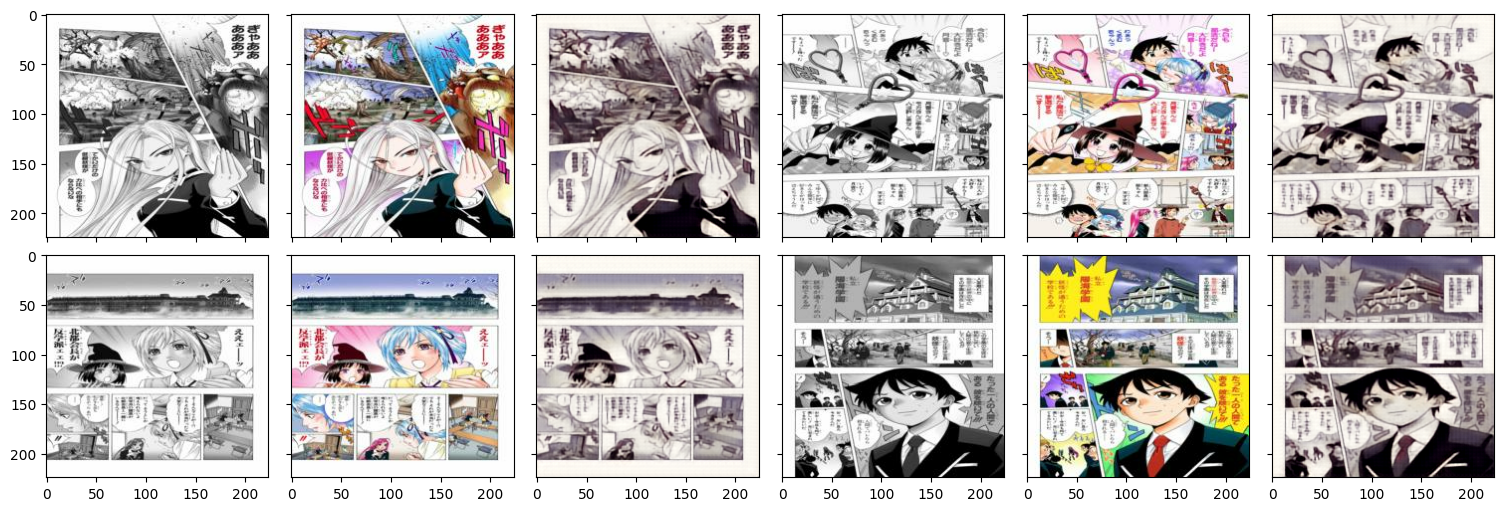

In [65]:
test_img_pred = model.predict(example2[0][0])[0]
test_img_pred2 = model.predict(example2[1][0])[0]
test_img_pred3 = model.predict(example2[2][0])[0]
train_img_pred = model.predict(example[0][0])[0]

f, axarr = plt.subplots(2,6, figsize=(15, 5), constrained_layout=True, sharex=True, sharey=True)
axarr[0,0].imshow(example2[0][0][0])
axarr[0,1].imshow(example2[0][1][0])
axarr[0,2].imshow(test_img_pred)
axarr[0,3].imshow(example2[1][0][0])
axarr[0,4].imshow(example2[1][1][0])
axarr[0,5].imshow(test_img_pred2)

axarr[1,0].imshow(example2[2][0][0])
axarr[1,1].imshow(example2[2][1][0])
axarr[1,2].imshow(test_img_pred3)
axarr[1,3].imshow(example[0][0][0])
axarr[1,4].imshow(example[0][1][0])
axarr[1,5].imshow(train_img_pred)



In [66]:
#comments

""" model = Sequential([
    Conv2D(FILTERS, (3, 3),  padding='same', name='conv2d_01'),
    LeakyReLU(),
    MaxPool2D((2, 2),  padding='same', name='max_pool_01'),
    Conv2D(FILTERS/2, (3, 3),  padding='same', name='conv2d_02'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPool2D((2, 2),  padding='same', name='max_pool_02'),
    Conv2D(FILTERS/4, (3, 3),  padding='same', name='conv2d_03'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPool2D((2, 2),  padding='same', name='max_pool_04'),
    Conv2D(FILTERS/4, (3, 3),  padding='same', name='conv2d_04'),
    Dropout(0.5),
    Activation('relu', name='relu_04'),
    UpSampling2D((2, 2)),
    Conv2D(FILTERS/2, (3, 3),  padding='same', name='conv2d_05'),
    Dropout(0.5),
    Activation('relu', name='relu_05'),
    UpSampling2D((2, 2)),
    Conv2D(FILTERS, (3, 3),  padding='same', name='conv2d_06'),
    Activation('relu', name='relu_06'),
    UpSampling2D((2, 2)),
    Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=1,
                                         padding='same'),
    Activation('tanh'),    
]) """

# model.add(Input(shape=[HEIGHT, WIDTH, 3]))

""" model.add(downsample(128,4, apply_batchnorm=False))
model.add(upsample(128,4, apply_dropout=True)) """

""" model = Sequential()
model.add(downsample(64,9, apply_batchnorm=False))
model.add(downsample(128,4))
model.add(upsample(128,4, apply_dropout=True))
model.add(Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer))
model.add(Activation('tanh')) """

""" model.add(downsample(128,4)) """
""" model.add(downsample(256,4)) """
""" model.add(downsample(128,4, apply_batchnorm=False))
model.add(downsample(128,4))
model.add(downsample(128,4)) """
""" model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2))) """

""" model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer))
model.add(Activation('tanh')) """


""" model.add(upsample(128,4, apply_dropout=True))
model.add(upsample(128,4, apply_dropout=True)) """
""" model.add(upsample(128,4))
model.add(upsample(128,4)) """
""" model.add(upsample(256,4, apply_dropout=True)) """
""" model.add(upsample(128,4)) """


""" 
model.add(UpSampling2D((2, 2))) """

""" encoder_output = (encoder_input)



decoder_output = (encoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output) """


' encoder_output = (encoder_input)\n\n\n\ndecoder_output = (encoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output) '